# Titolo elaborato

**Programmazione di applicazioni Data Intesive**

Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Matteo Bagnolini

`matteo.bagnolini5@studio.unibo.it`

## Descrizione del problema e analisi del Dataset
Si vuole realizzare un modello di machine learning che, utilizzando alcune informazioni riguardo le condizioni atmosferiche di una città, permetta di predirre il numero di noleggi di biciclette ogni ora.

Vengono importate le librerie fondamentali, che saranno usate in seguito per il caricamento e l'analisi del dataset.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Vengono importate le librerie fondamentali, che saranno usate in seguito per il caricamento e l'analisi del dataset.

### Caricamento del Dataset e preprocessing

In [56]:
import os
from urllib.request import urlretrieve
def download(file, url):
    if not os.path.isfile(file):
        urlretrieve(url, file)

Si è preso come riferimento [questo](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand) dataset, trovato sulla piattaforma "Machine Learning Repository". Il dataset contiene quasi 9000 righe, con 14 features. All'interno sono presenti i dati di noleggio di biciclette e delle condizioni atmosferiche della città di Seoul nell'arco temporale di un anno (da dicembre 2017 a dicembre 2018).

In [57]:
dataset_url = "https://archive.ics.uci.edu/static/public/560/seoul+bike+sharing+demand.zip"
zipfile_name = "seoul_bike_sharing_demand.zip"

download(zipfile_name, dataset_url)

from zipfile import ZipFile
with ZipFile(zipfile_name) as f:
    f.extractall()

Si definisce un dizionario dove vengono specificati i tipi dei dati delle colonne, per ridurre al minimo l'utilizzo di memoria per il dataframe.

In [58]:
types = {
    "Rented Bike Count": int,
    "Hour": int,
    "Temperature(°C)": float,
    "Humidity(%)": float,
    "Wind speed (m/s)": float,
    "Visibility (10m)" : int,
    "Dew point temperature(°C)": float,
    "Solar Radiation (MJ/m2)": float,
    "Rainfall(mm)": float,
    "Snowfall (cm)": float,
    "Seasons": "category",
    "Holiday": "category",
    "Functioning Day": "category",
}

In [59]:
data = pd.read_csv(
    "SeoulBikeData.csv",
    sep=",",
    encoding='latin-1',
    dtype=types,
    parse_dates=["Date"],
    dayfirst=True,
)

data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Di seguito sono riportate le dimensioni in memoria, il numero di istanze non nulle e il tipo di ogni feature che compongono i dati all'interno del dataset.

In [60]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   float64       
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   category      
 12  Holida

Notiamo come nel dataset preso in considerazione non siano presenti valori nulli, quindi tutti i valori sembrerebbero validi.

Vediamo anche che i nomi delle variabili sono relativamente complessi (alcuni mostrano l'unità di misura). Queste informazioni non ci serviranno e sono scomode per la scrittura del codice, quindi passiamo a rinominare le features con nomi più significativi.

In [61]:
new_names = {
    "Date": "date",
    "Rented Bike Count": "rented_bike_counts",
    "Hour": "hour",
    "Temperature(°C)": "temperature",
    "Humidity(%)": "humidity",
    "Wind speed (m/s)": "wind_speed",
    "Visibility (10m)" : "visibility",
    "Dew point temperature(°C)": "dew_point_temperature",
    "Solar Radiation (MJ/m2)": "solar_radiation",
    "Rainfall(mm)": "rainfall",
    "Snowfall (cm)": "snowfall",
    "Seasons": "seasons",
    "Holiday": "holiday",
    "Functioning Day": "functioning_day",
}

In [62]:
data = data.rename(columns=new_names)
data.head()

,date,rented_bike_counts,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,2017-12-01,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Verifichiamo quali valori assumono le variabili categoriche:

In [63]:
data["seasons"].value_counts()

seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [64]:
data["holiday"].value_counts()

holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [65]:
data["functioning_day"].value_counts()

functioning_day
Yes    8465
No      295
Name: count, dtype: int64

Notiamo che sia `functioning_day` e `holiday` assumono solamente due valori differenti, quindi possiamo trasformarle in variabili booleane.

In [86]:
data[["functioning_day", "holiday"]] = data[["functioning_day", "holiday"]].astype("object").replace({"Yes": True, "No": False, "No Holiday": False, "Holiday": True})

/var/folders/2_/6f7vjkqn71g8n7jhlbsh_l5c0000gn/T/ipykernel_79429/994866998.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[["functioning_day", "holiday"]] = data[["functioning_day", "holiday"]].astype("object").replace({"Yes": True, "No": False, "No Holiday": False, "Holiday": True})


Per aumentare la leggibilità del dataframe, affianchiamo la colonna `hour` con la colonna `date`.

In [87]:
cols = data.columns.tolist()

cols[1], cols[2] = cols[2], cols[1]

data = data[cols]
data.head()

,date,rented_bike_counts,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,2017-12-01,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,False,True
1,2017-12-01,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,False,True
2,2017-12-01,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,False,True
3,2017-12-01,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,False,True
4,2017-12-01,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,False,True


### Significato delle features

Si riportano l'elenco delle features del dataset, con una breve descrizione.

- `date`: data della misurazione
- `rented_bike_count`: numero di biciclette noleggiate
- `hour`: ora della misurazione
- `temperature`: temperatura registrata (in Celsius)
- `humidity`: umidità relativa (in %)
- `wind_speed`: velocità del vento (in m/s)
- `visibility`. visibilità misurata in decine di metri
- `dew_point_temperature`: temperature di rugiada (in Celsius), indica il punto in cui l'umidità nell'aria condensa
- `solar_radiation`: radiazione solare (in Mj/m^2)
- `rainfall`: precipitazioni piovose (in mm)
- `snowfall`: precipitazioni nevose (in cm)
- `Seasons`: stagione nella quale è stata effettuata la misura (Winter, Spring, Summer, Autumn)
- `holiday`: indica se il giorno era festivo o meno
- `functioning_day`: indica se il servizio era funzionante quel giorno

Come detto in precedenza, l'obiettivo è costruire un modello di regressione che permette di trovare il conteggio di biciclette noleggiate partendo dalle informazioni atmosferiche. Per questo motivo, la variabile `rented_bike_count` sarà la nostra variabile obiettivo.

### Analisi esplorativa delle features

Di seguito eseguiamo un'analisi esplorativa delle features del nostro dataset.

Otteniamo una descrizione generale, con alcune statistiche base, delle variabili del nostro dataset.

In [88]:
data.describe()

,date,rented_bike_counts,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


Analizzando queste statistiche, vediamo come i dati sembrino veritieri.

Vediamo che il in media vengono noleggiate 700 biciclette all'ora, con picchi molto alti di 3556 noleggi all'ora. Il minimo è 0, presumibilmente verificatosi durante i giorni di non funzionamento.

La temperature presenta un'escursione abbastanza elevata, passando da -17 gradi a quasi 40, con una media di 13.

Dai valori della visibilità notiamo come ci siano alcuni giorni molto nebbiosi (con visibilità sotto i 300 metri). In media però sembrano non esserci problemi di visibilità.

#### Analisi delle singole features

Passiamo ora ad analizzare singolarmente alcune variabili significative, anche con l'utilizzo di grafici.

Definiamo una funzione che ci permetta di mostrare, uno di fianco all'altro, i grafici box e istogramma.

In [89]:
def plot_box_and_hist(dataframe, feature_name, showmeans=True, bins=4, figsize=(20, 10)):
    
    figure, axis = plt.subplots(1, 2, figsize=figsize)
    boxscore = dataframe[feature_name].plot.box(ax=axis[0] ,showmeans=showmeans)
    axis[0].set_title("Box")
    
    hist = dataframe[feature_name].plot.hist(ax=axis[1], bins=bins)
    axis[1].set_title("Histogram")
    axis[1].set_xlabel(feature_name)
    axis[1].set_ylabel("frequency")
        
    plt.show()

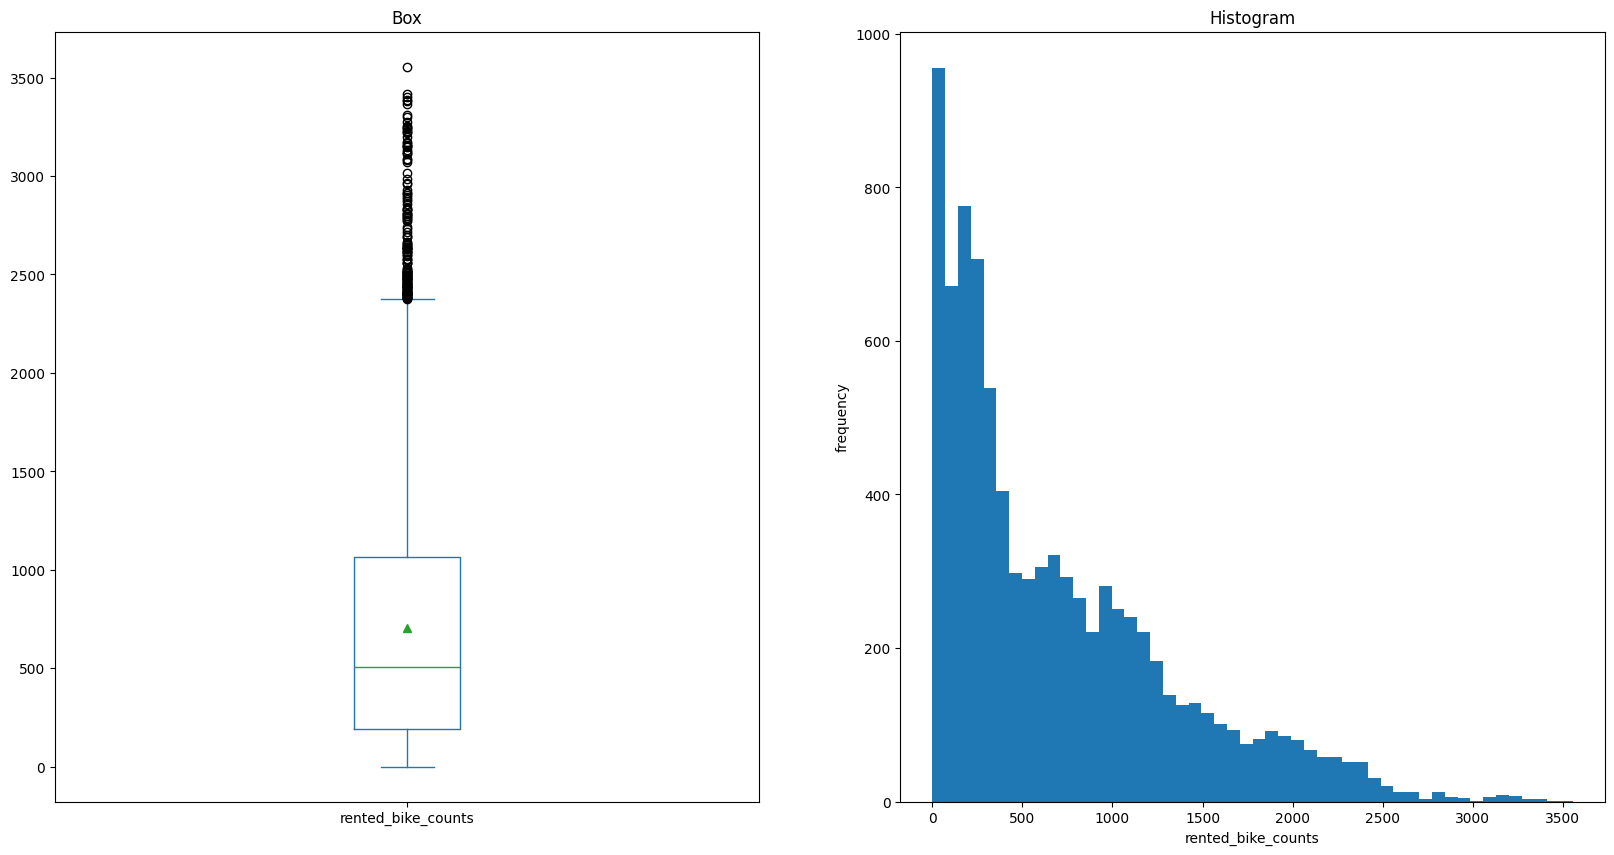

In [90]:
plot_box_and_hist(data, "rented_bike_counts", bins=50)

Dai grafici ottenuti per la variabile `rented_bike_counts`, vediamo che per la maggior parte delle ore prese in considerazione, ci sono pochi noleggi (meno di 300). Notiamo che la mediana è di circa 500 noleggi all'ora, e la media leggermente più alta, a circa 700. Notiamo inoltre la presenza di molti outlier nella parte superiore. I grafici descrivono ciò che ci aspettiamo: molti noleggi negli orari di punta, e pochi noleggi nel resto della giornata. Bisogna considerare anche il fatto che le misure sono condotte anche nelle ore notturne, nelle quali ci aspettiamo pochi noleggi.

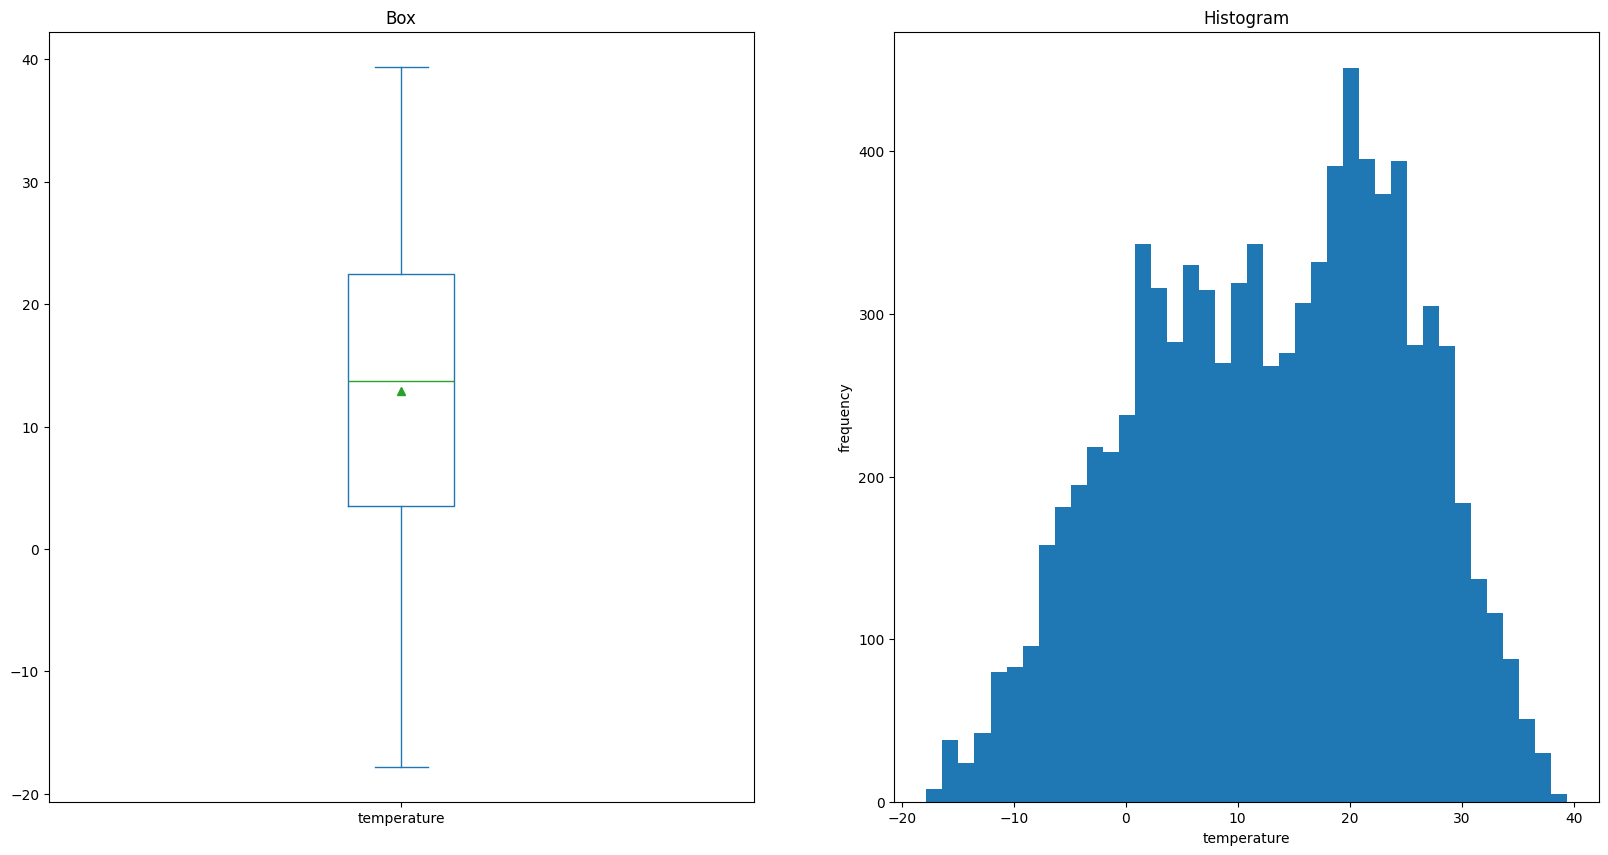

In [91]:
plot_box_and_hist(data, "temperature", bins=40)

Dai grafici della variabile `temperature` vediamo che l'istogramma segue approssimativamente una distribuzione normale, in linea con quello che ci aspettiamo. Le temperature registrate vanno da -18 a circa 40 gradi. L'escursione termica è molto alta (deviazione standard di quasi 12 gradi), infatti Seoul è considerata una città molto fredda e secca d'inverno, e calda e umida d'estate. Dal grafico a box notiamo che non sono presenti outliers, e che la mediana è in linea con la media.

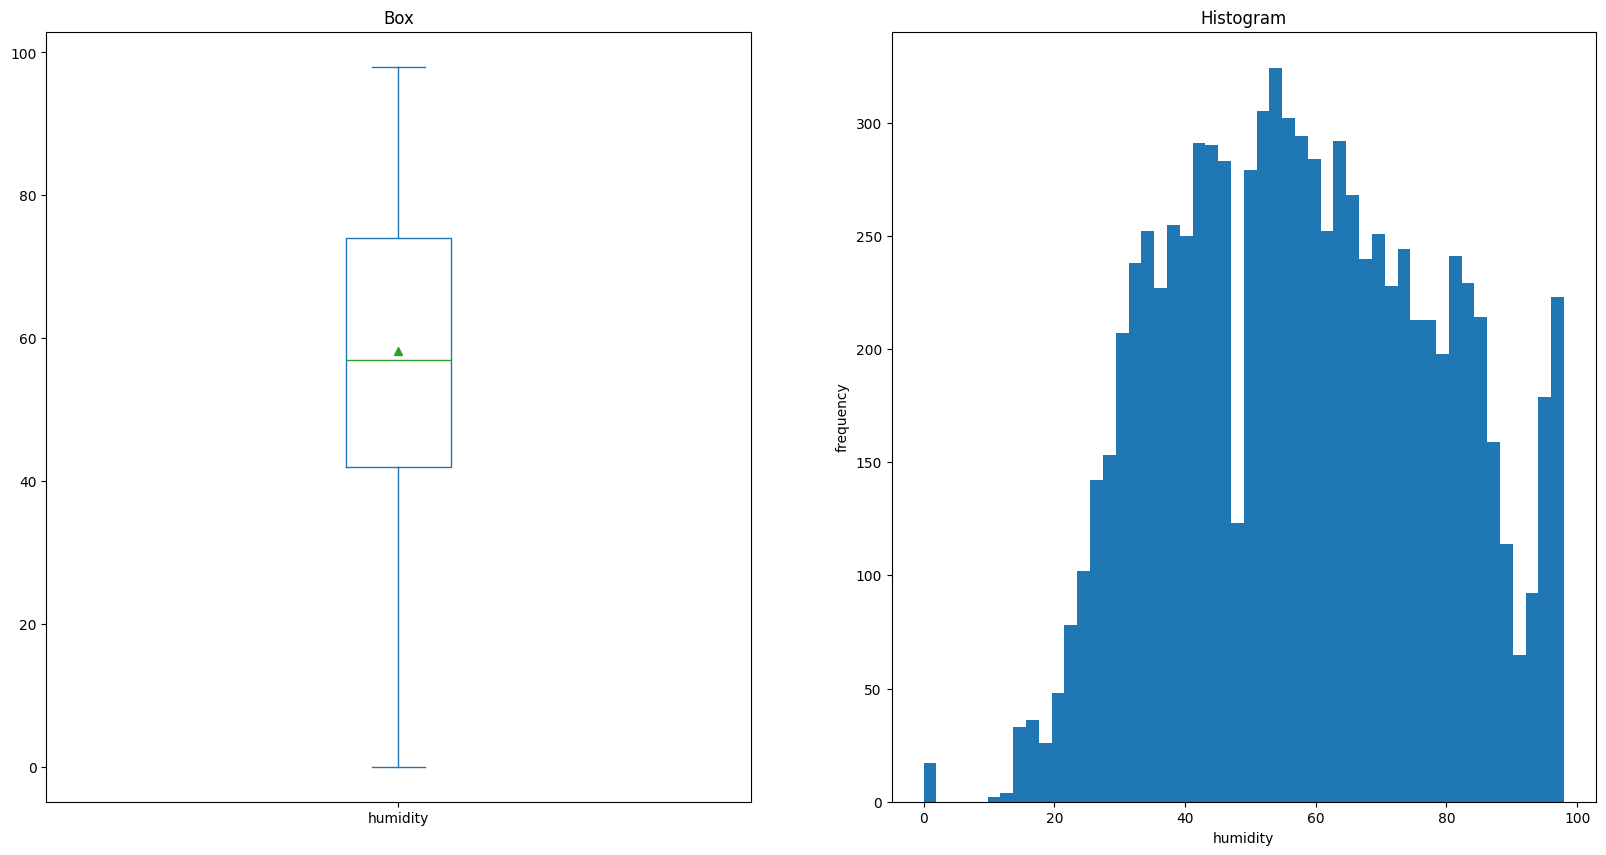

In [92]:
plot_box_and_hist(data, "humidity", bins=50)

Come per la temperature, dalla variabile `humidity` notiamo un andamento che può ricordare una distribuzione normale. Come detto per la temperature, Seoul è una città secca d'inverno e umida d'estate, per questo ritroviamo tutti i valori possibili di umidità.

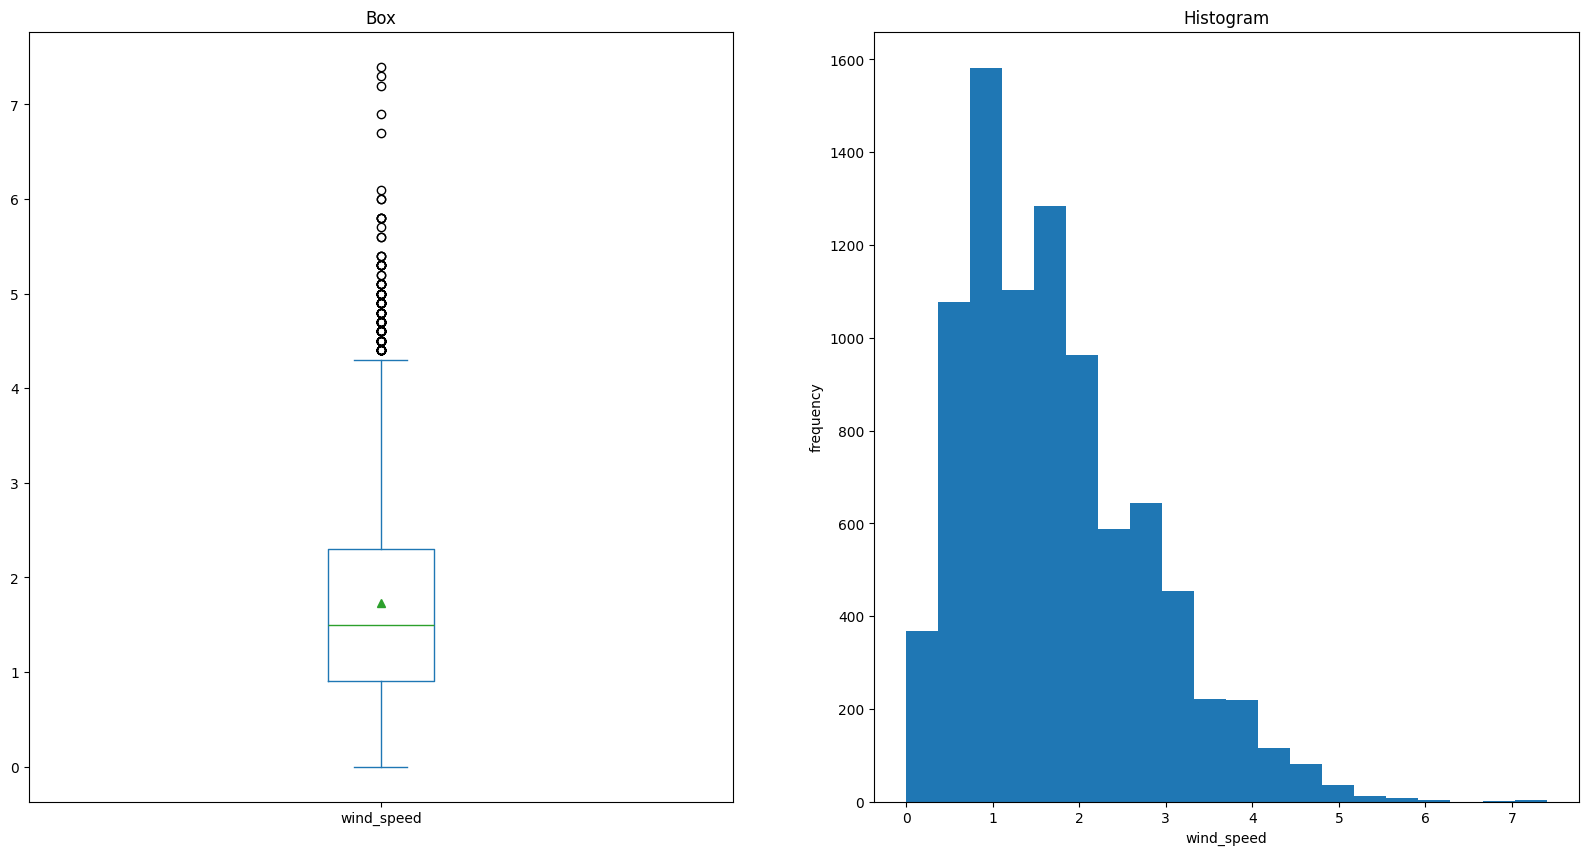

In [93]:
plot_box_and_hist(data, "wind_speed", bins=20)

I grafici della variabile `wind_speed` mostrano la presenza di poche ore con un vento relativamente forte (7.5 m/s, circa 27 km/h), e tante ore con un vento debole o assente. Questi valori sono in linea con i dati del vento nelle aree urbane, dove forti folate di vento sono molto rare.

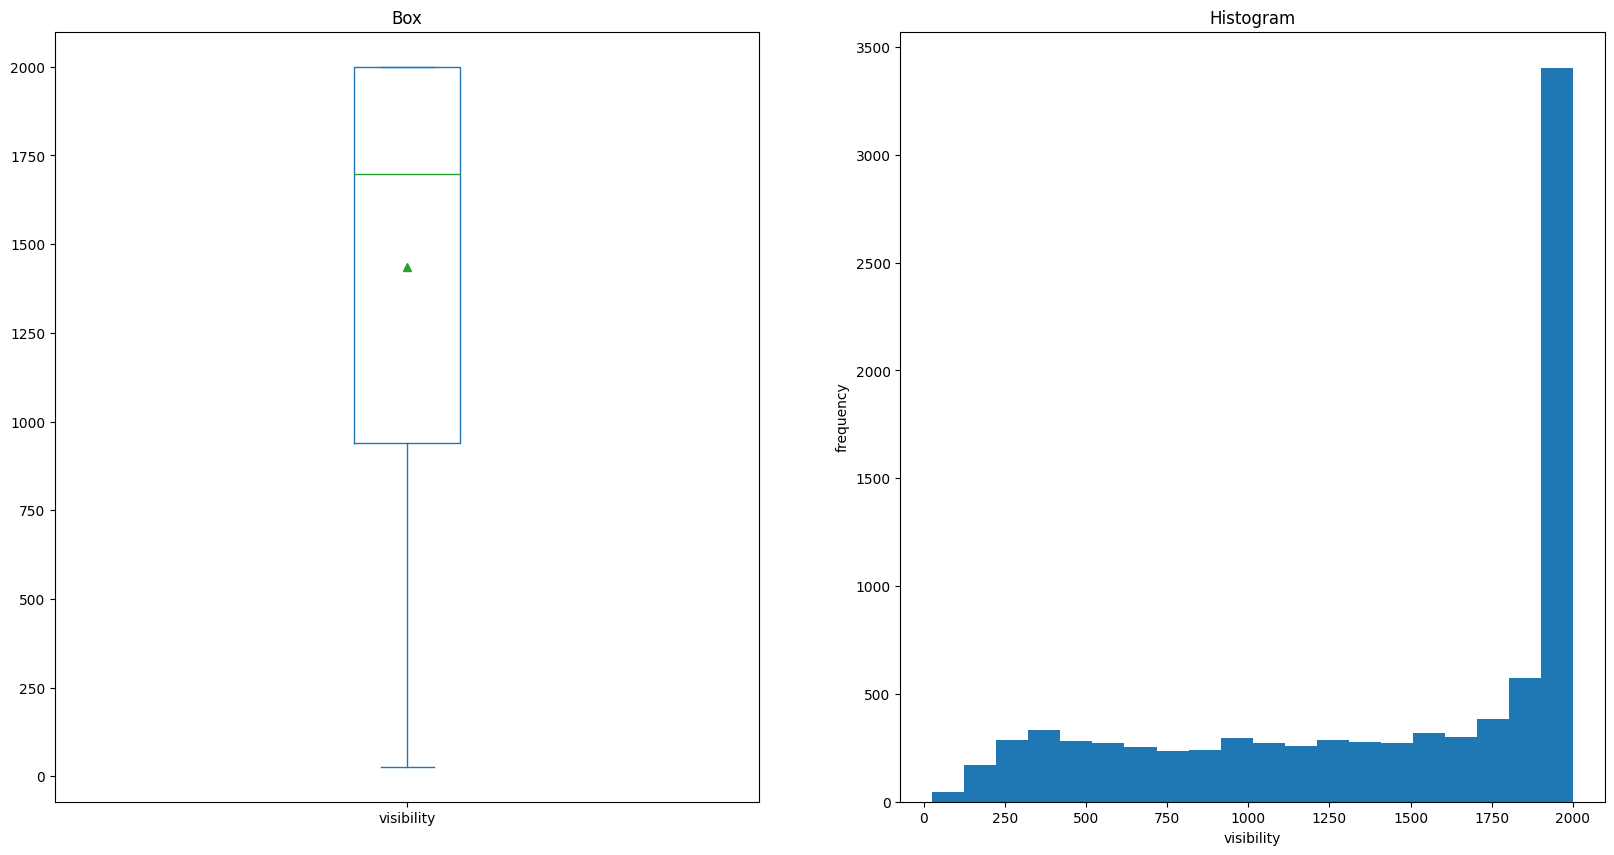

In [94]:
plot_box_and_hist(data, "visibility", bins=20)

I grafici della variabile `visibility` mostrano che la visibilità è per la maggior parte del tempo abbastanza buona (da 15 a 20km), anche se sembra che i valori siano limitati a 20km. È possibile quindi che i dati effettivi superino questo valore. La presenza di dati intermedi (da 1 a 15 km) è assolutamente plausibile, considerando che Seoul è una città con alto tasso di inquinamento, che ne limita la visibilità.

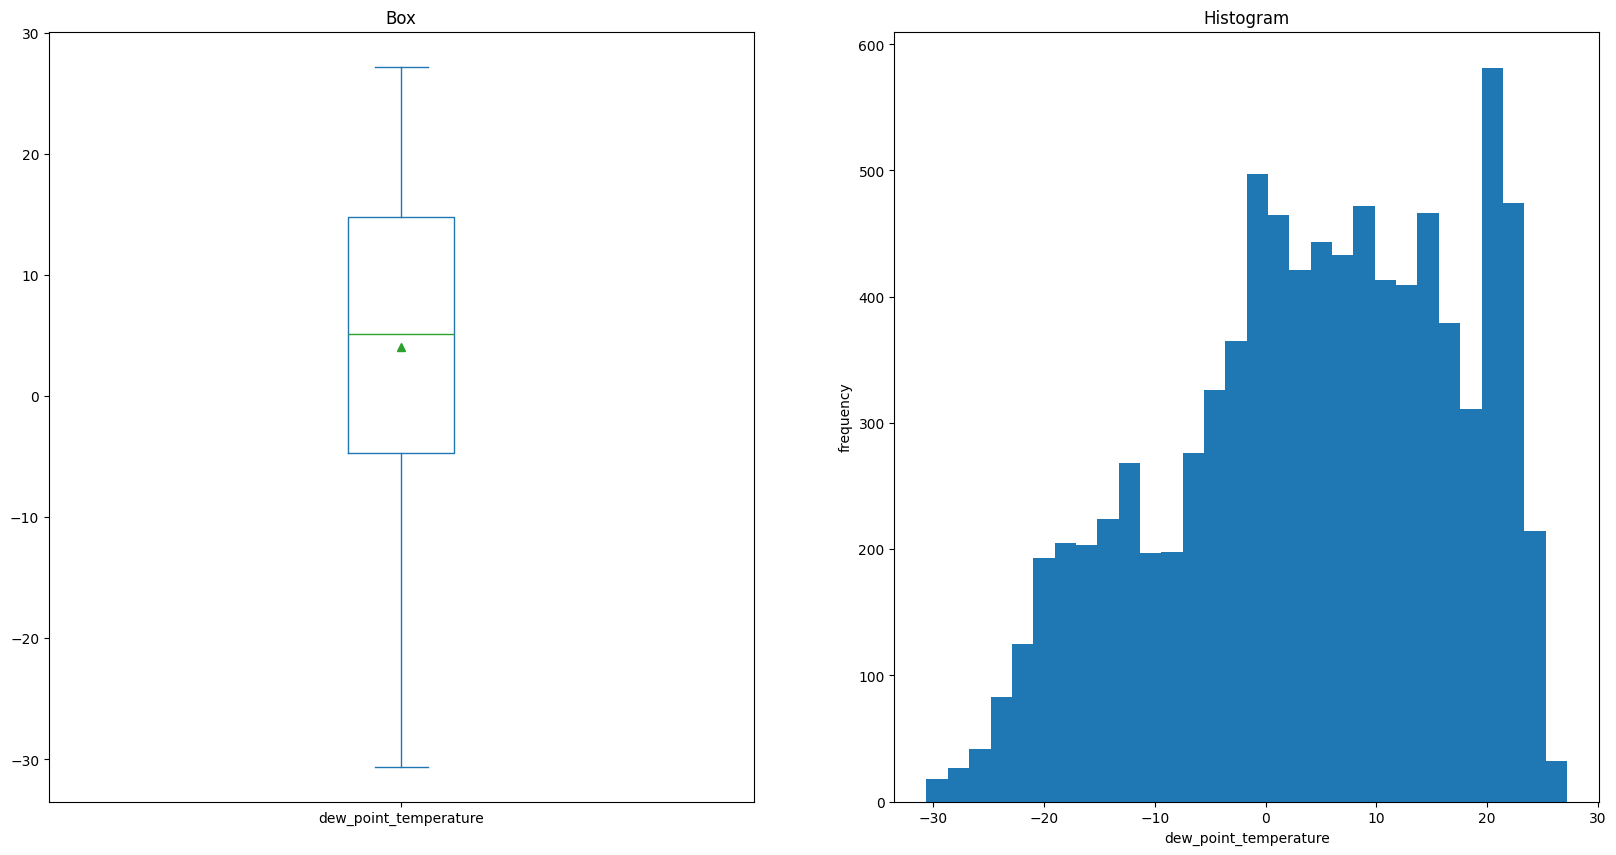

In [95]:
plot_box_and_hist(data, "dew_point_temperature", bins=30)

Anche questi grafici mostrano valori plausibili della temperatura di rugiada, con una distribuzione approssimativamente normale. Non sono presenti outliers.

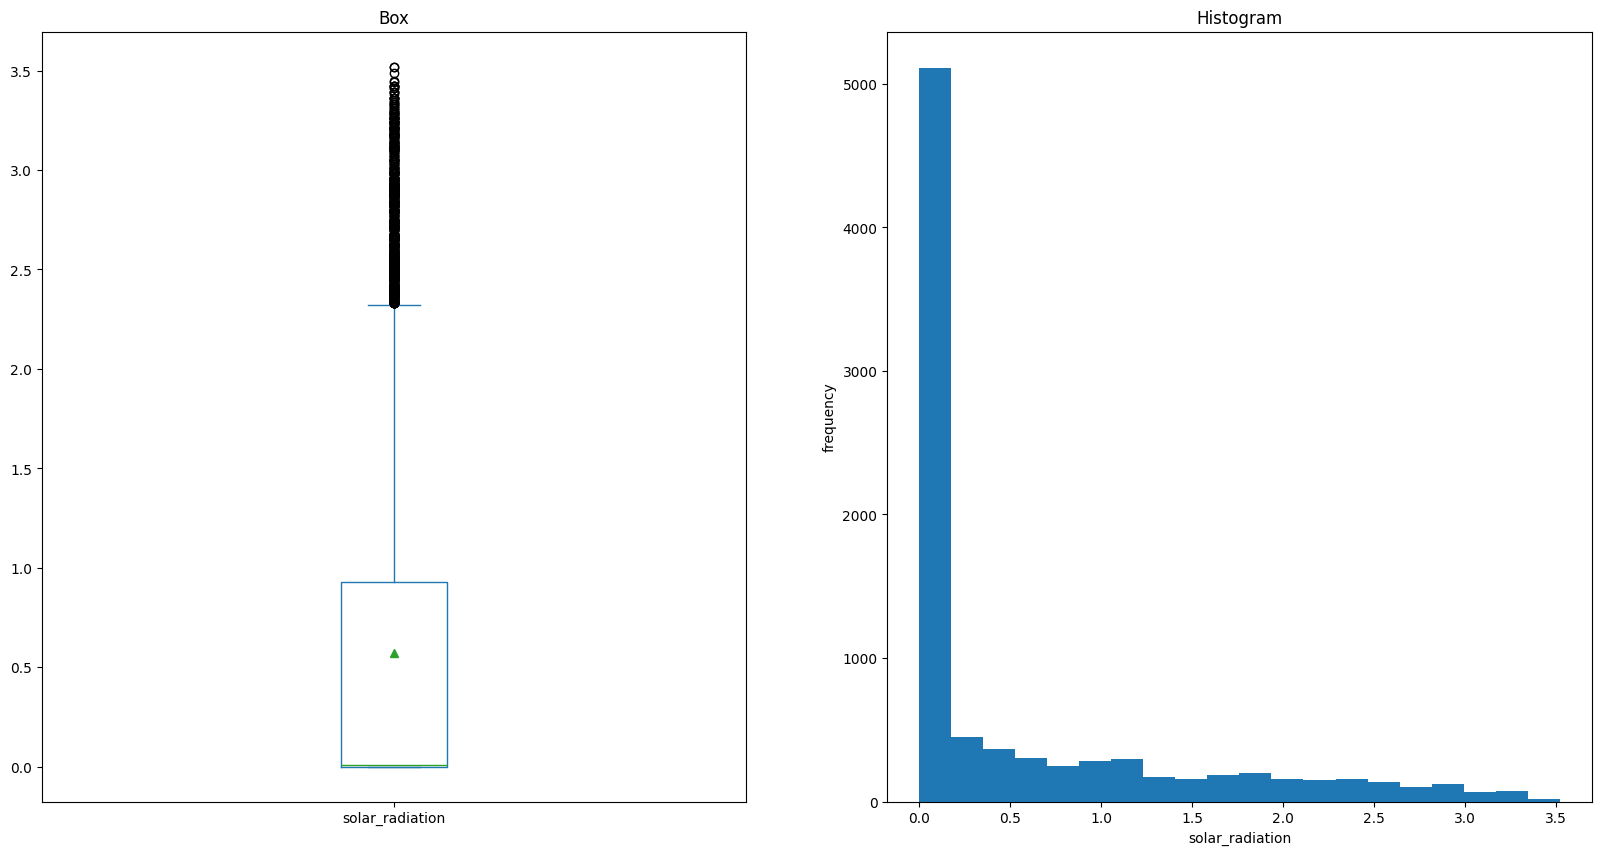

In [96]:
plot_box_and_hist(data, "solar_radiation", bins=20)

I grafici della variabile `solar_radiation` mostrano un comportamento atteso: molti valori dove la radiazione solare è nulla. Questi valori corrispondono con altissima probabilità alle ore notturne. Per questo motivo il grafico box mostra una mediana molto bassa (vicina allo 0) e moltissimi outlier.

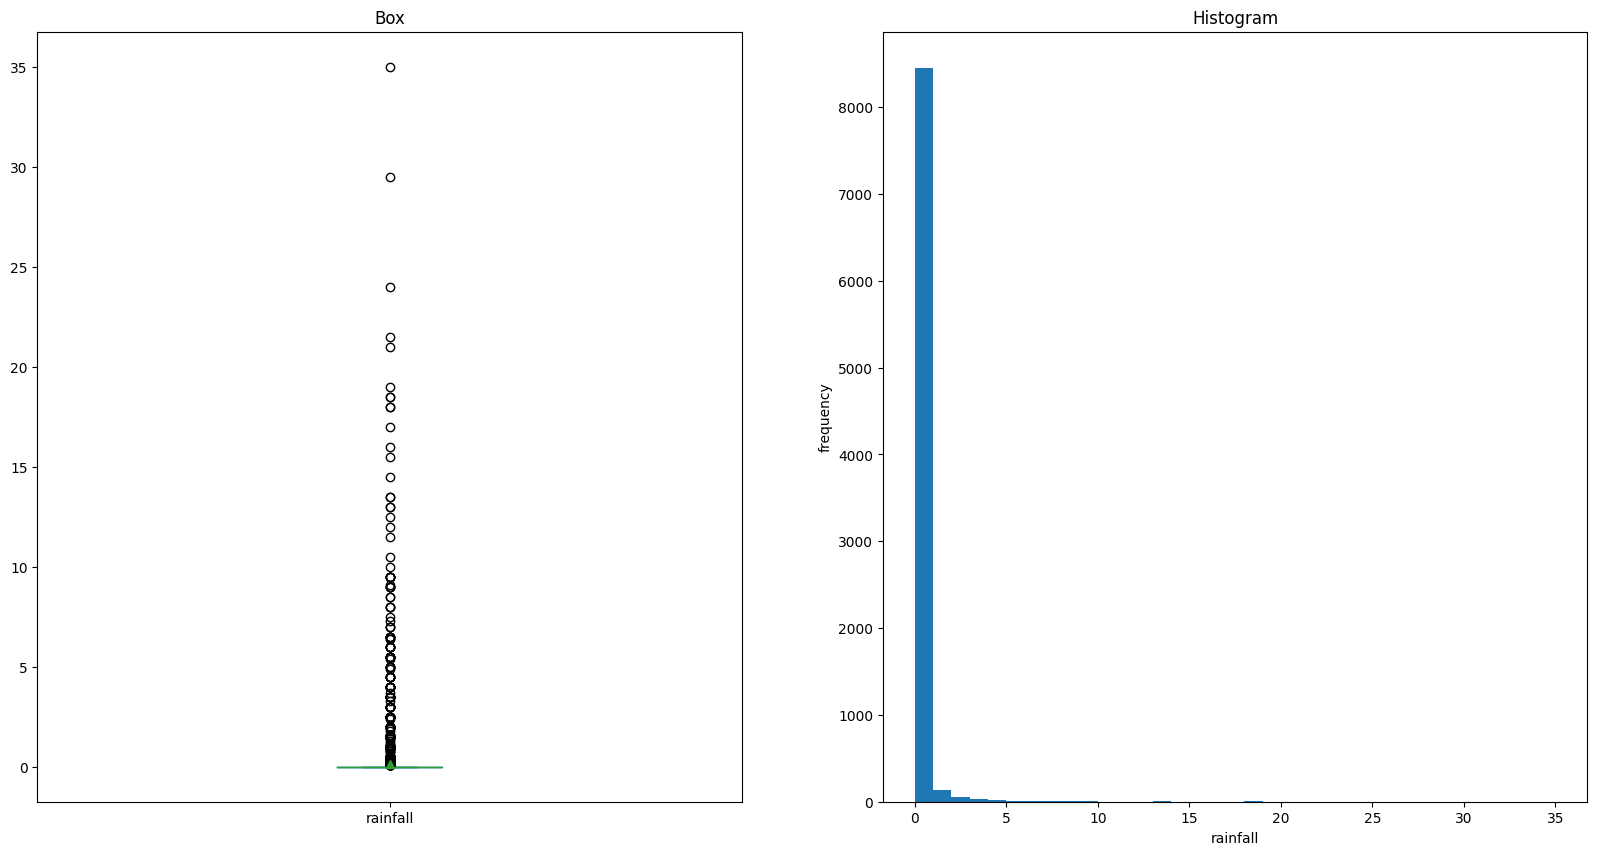

In [97]:
plot_box_and_hist(data, "rainfall", bins=35)

Dal grafico della variabile `rainfall` notiamo che per la maggior parte delle ore non si sono verificate piogge, ma sono presenti un numero limitato di ore dove le precipitazioni sono state intense. Per questo motivo, troviamo molti outlier nel grafico box.

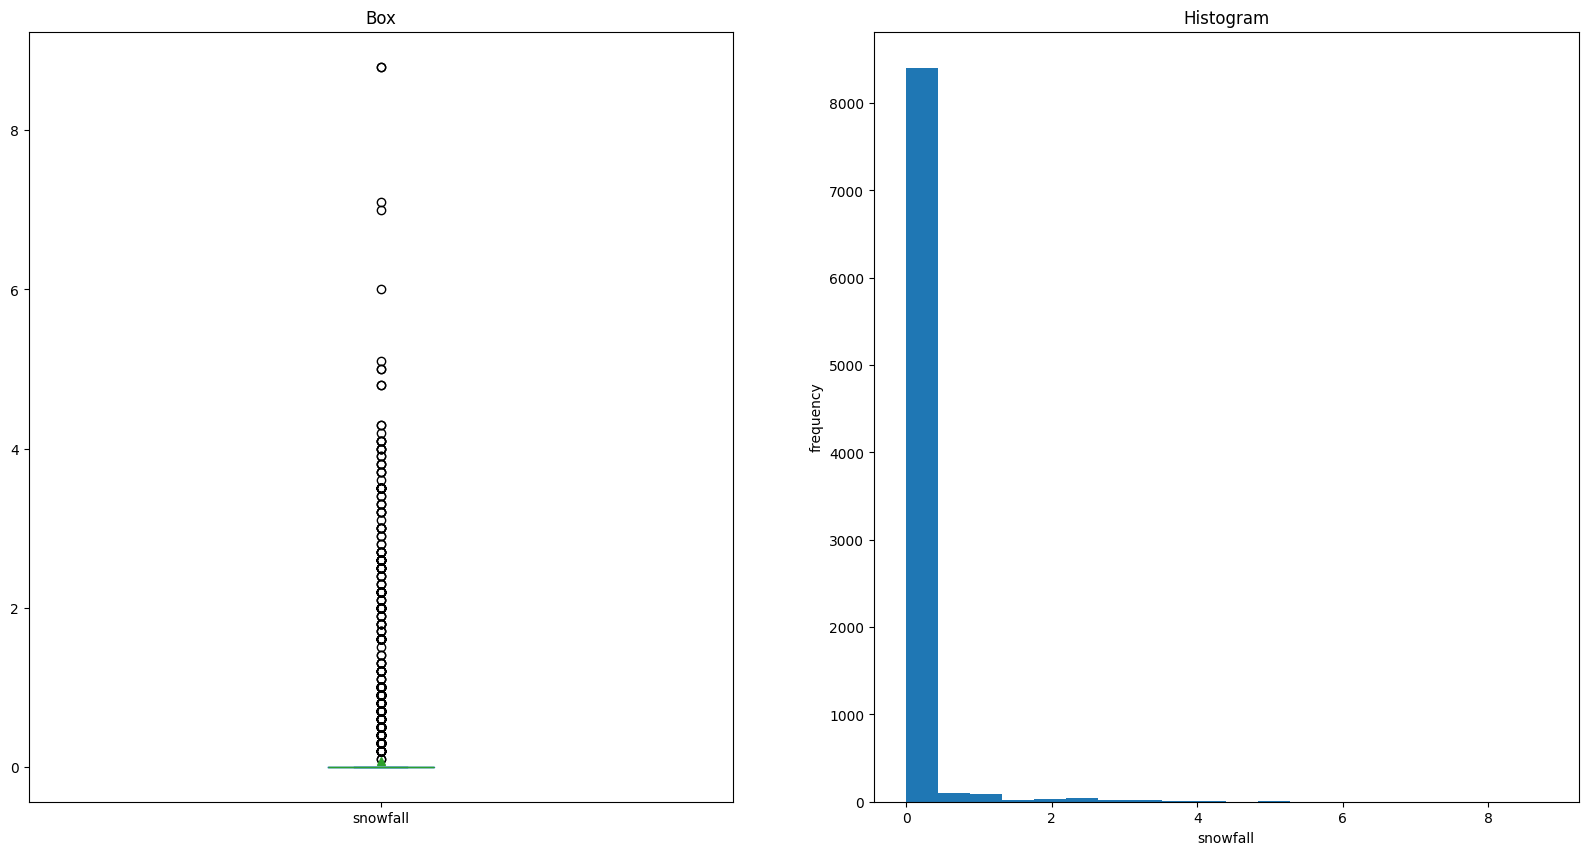

In [98]:
plot_box_and_hist(data, "snowfall", bins=20)

Lo stesso discorso può essere fatto per la variabile `snowfall`. Notiamo poche ore di precipitazioni nevose, e di conseguenza molti outlier.

Passiamo ora a mostrare informazioni per le variabili categoriche, attraverso grafici a torta.

In [99]:
def plot_pie(data, feature_name):
    data[feature_name].value_counts().plot.pie(autopct="%.2f%%", title=feature_name)

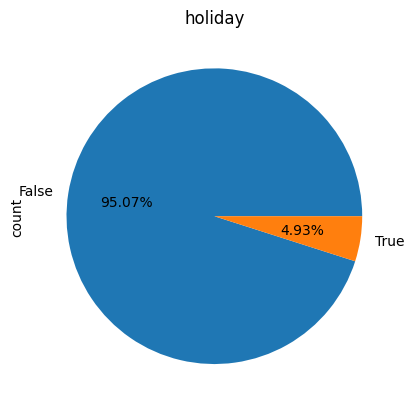

In [100]:
plot_pie(data, "holiday")

Dal grafico per la variabile `holiday` notiamo che la maggior parte delle ore prese in considerazione siano relative a giorni feriali, e solamente il 5% delle ore si riferiscano a giorni festivi. Sarà interessante vedere se nei giorni feriali il servizio di noleggio rimane disponibile, o viene interrotto.

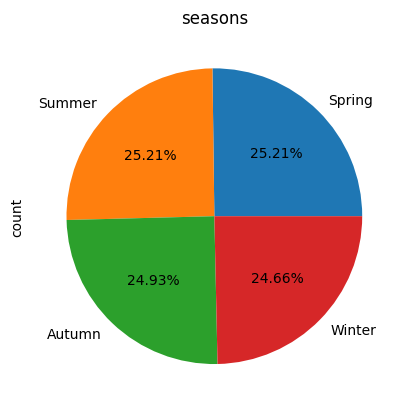

In [101]:
plot_pie(data, "seasons")

Come ci potevamo aspettare, dal grafico della variabile `seasons` vediamo che le ore sono distribuite uniformemente nelle 4 stagioni. Infatti il dataset copre un arco temporale di un anno esatto (8760 ore).

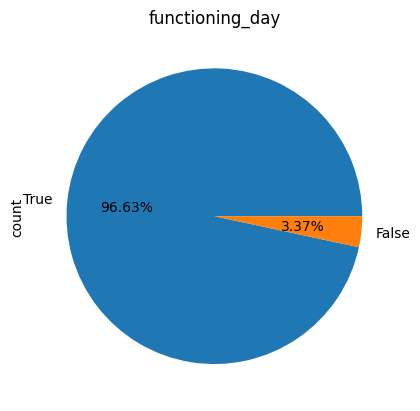

In [102]:
plot_pie(data, "functioning_day")

Dal grafico di `functioning_day` notiamo che solamente nel 3.37% delle ore annue il servizio non è in funzione. Ci aspettiamo che in queste ore il numero di noleggi sia 0.  Successivamente analizzeremo se queste ore coincidono con le ore di giornate festive.

#### Analisi esplorativa tra più features

Andiamo ora a cercare delle relazioni tra insiemi di features, e cerchiamo di estrapolare informazioni che potrebbero essere utili per la creazione del modello.

Verifichiamo che non ci siano noleggi effettuati nelle ore di non operatività del servizio:

In [103]:
data["functioning_day"].describe()

count     8760
unique       2
top       True
freq      8465
Name: functioning_day, dtype: object

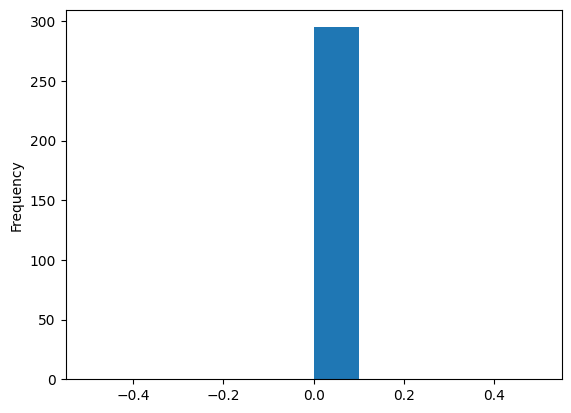

In [131]:
non_functioning_hours_with_rents = (data["functioning_day"] == False)

data[non_functioning_hours_with_rents]["rented_bike_counts"].plot.hist();

Vediamo che l'istogramma che descrive il numero di noleggi nei soli giorni di non operabilità mostra che i noleggi sono 0. Questo significa che, come ci aspettavamo, non ci sono noleggi nelle ore di non funzionamento del servizio.

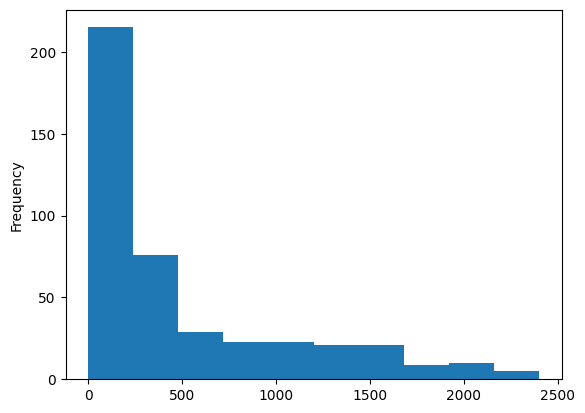

In [133]:
holiday_hours = (data["holiday"] == True)

data[holiday_hours]["rented_bike_counts"].plot.hist();

Vediamo che invece nei giorni festivi, ci sono comunque dei noleggi, che seguono approssimativamente l'andamento del grafico della variabile `rented_bike_counts` relativa a tutte le ore annuali. Questo significa che durante le ore dei giorni festivi ci sono tanti noleggi quanto nei giorni non festivi.

Verifichiamo se le ore festive coincidono, anche in parte, con le ore di non funzionamento del servizio:

In [157]:
holidays_and_no_functioning = (data["holiday"] == True) & (data["functioning_day"] == False)
data[holidays_and_no_functioning]["hour"].count()

np.int64(24)

I risultati mostrano che ci sono 24 ore annue di non funzionamento combinato con ore di festività, che rappresentano una piccolissima parte delle ore totali. Ovviamente, in queste ore i noleggi sono 0.

Verifichiamo ora che le radiazioni siano nulle nelle ore notturne, mostrando la radiazione solare media per ogni ora:

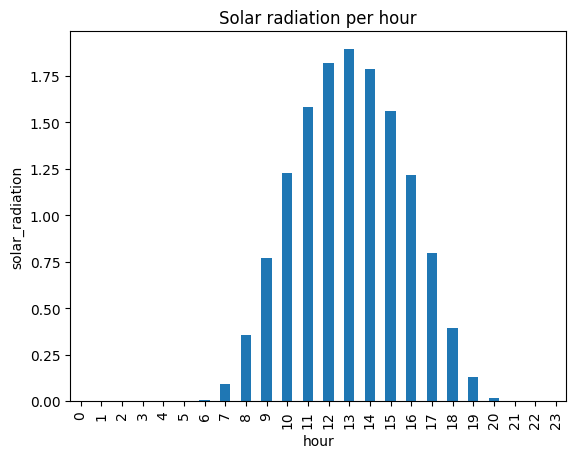

In [174]:
data.groupby('hour')["solar_radiation"].mean().plot.bar(title="Solar radiation per hour", ylabel="solar_radiation");

Come ci aspettavamo, la radiazione media nelle ore notturne è nulla, mentre cresce durante la giornata, arrivando a un amssimo nelle ore centrali, per poi scendere nuovamente.

Vediamo ora le ore in cui si sono verificati più noleggi:

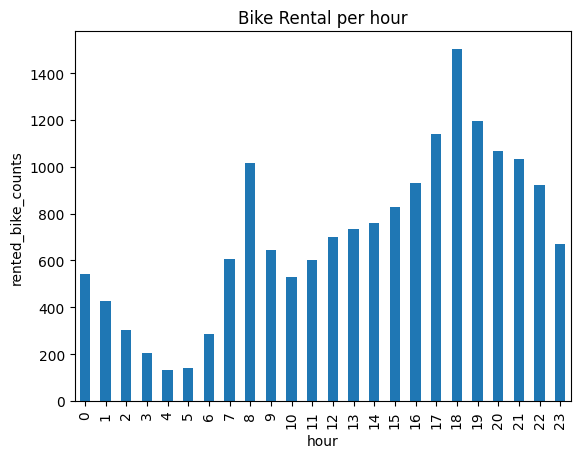

In [178]:
data.groupby("hour")["rented_bike_counts"].mean().plot.bar(title="Bike Rental per hour", ylabel="rented_bike_counts");

Notiamo che, come già ci aspettavamo, ci sono dei picchi nelle ore di punta lavorative (8 e 18), e che i noleggi calano notevolmente nelle ore notturne.

Vediamo il numero di noleggi quando le condizioni atmosferiche sono sfavorevoli:

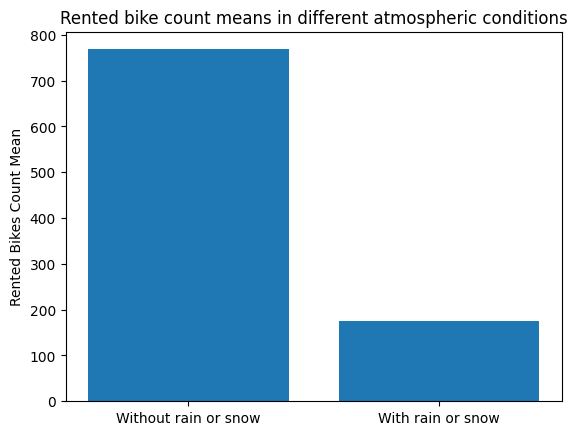

In [224]:
rainy_or_snowy = (data["rainfall"] > 0) | (data["snowfall"] > 0)
rented_bike_with_rain_or_snow = data[rainy_or_snowy]["rented_bike_counts"].mean()
rented_bike_without_rain_and_snow = data[~rainy_or_snowy]["rented_bike_counts"].mean()

plt.bar(["Without rain or snow", "With rain or snow"], [rented_bike_without_rain_and_snow, rented_bike_with_rain_or_snow])
plt.title("Rented bike count means in different atmospheric conditions")
plt.ylabel("Rented Bikes Count Mean")
plt.show()

Notiamo come il numero di noleggi orario medio cali drasticamente in condizioni di pioggia o neve.

Vediamo le stagioni con più noleggi:

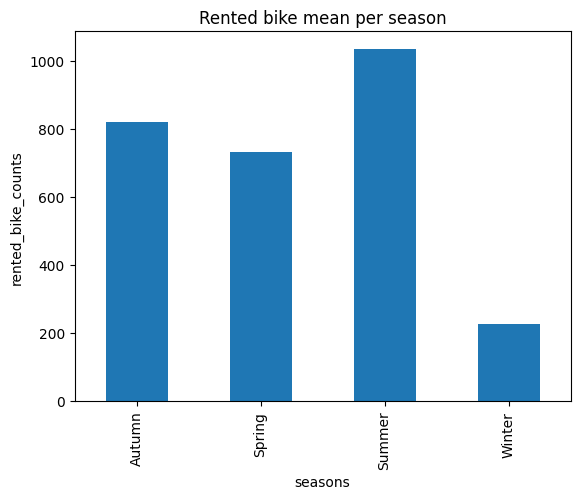

In [234]:
data.groupby("seasons", observed=True)["rented_bike_counts"].mean().plot.bar(title="Rented bike mean per season", ylabel="rented_bike_counts");

Come potevamo aspettarci, l'inverno è la stagione con meno noleggi, probabilemente a causa delle basse temperature e delle precipitazioni più frequenti. Invece la stagione con più noleggi è l'estate, quando le temperature sono più alte e il meteo è migliore.

Vediamo ora qualche grafico a dispersione per cercare relazioni tra le variabili:

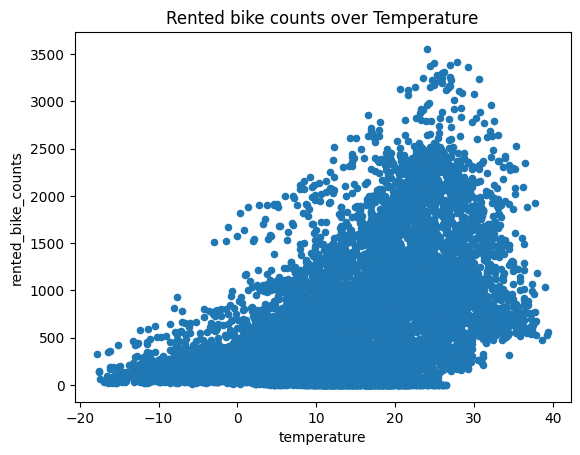

In [237]:
data.plot.scatter("temperature", "rented_bike_counts", title="Rented bike counts over Temperature");

Sembra esserci una relazione tra il numero di bici noleggiate e la temperatura registrata. Plausibilmente, quando le temperature sono più alte, ci sono più noleggi.

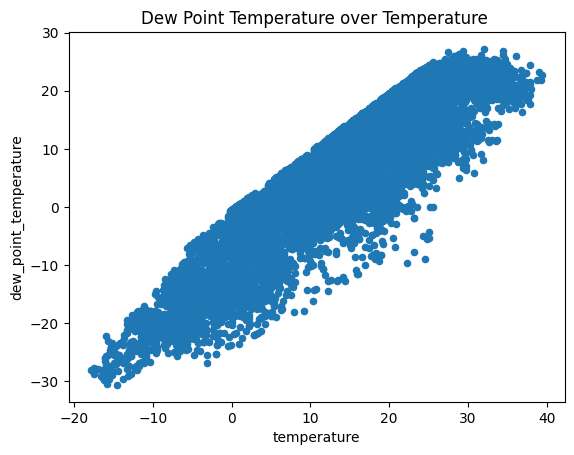

In [238]:
data.plot.scatter("temperature", "dew_point_temperature", title="Dew Point Temperature over Temperature ");

Sembra esserci una forte relazione tra la temperatura e la temperatura di rugiada. Infatti, la temperatura di rugiada (o punto di rugiada)  si può calcolare empiricamente a partire dalla temperatura ambientale e dall'umidità relativa.

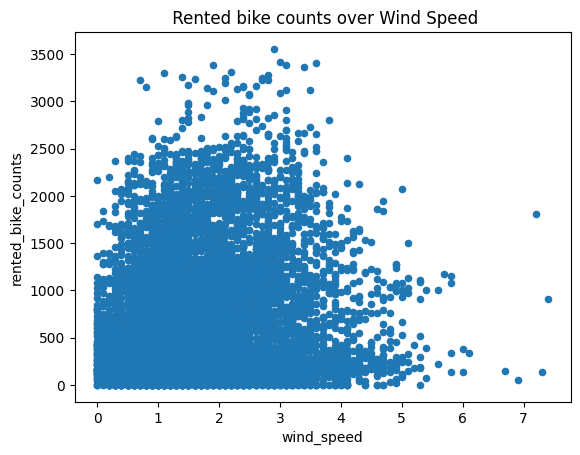

In [239]:
data.plot.scatter("wind_speed", "rented_bike_counts", title=" Rented bike counts over Wind Speed");

In questo caso non vediamo una forte relazione tra la la velocità del vento e il numero di biciclette noleggiate.

Passiamo ora a visualizzare una tabella completa con le correlazioni tra le variabili

[]

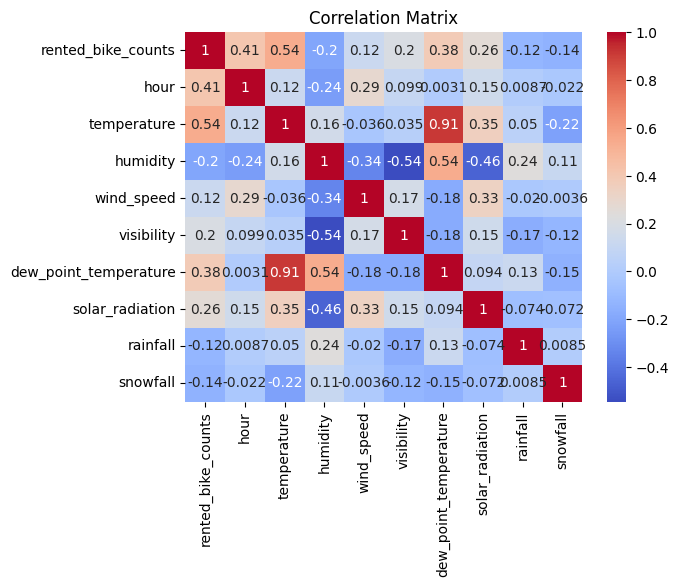

In [245]:
import seaborn as sns

corr_matr = data[["rented_bike_counts", "hour", "temperature", "humidity", "wind_speed", "visibility", "dew_point_temperature", "solar_radiation", "rainfall", "snowfall"]].corr()

sns.heatmap(corr_matr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.plot()

Dalla matrice di correlazione notiamo alcune relazioni già intuite precedentemente con i grafici. Vediamo che l'ora e il numero di noleggi sono molto correlate, così come la temperatura e il numero di noleggi.

Notiamo anche che la temperatura di rugiada è molto correlata con la temperatura. Potrebbe essere quindi utile nel modello eliminare una di queste due colonne, per evitare ridondanza dei dati.